# Text Entry Technique Experiment

## Experiment Analysis:

### Load and activate pycodestyle

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

### Import libraries and read-in data

In [61]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from  matplotlib.ticker import FuncFormatter
from scipy.stats import ttest_ind

df_text_entry_log = pd.read_csv('text_entry_log.csv')
df_text_entry_log

,event_type,timestamp,participant_id,condition,with_autocompletion,entered_content,start_time_in_s,end_time_in_s,duration_in_s
0,EventTypes.KEY_PRESSED,1.621444e+09,1,with_autocompletion_text_2,True,NaN,1.621444e+09,1.621444e+09,0.000000
1,EventTypes.KEY_PRESSED,1.621444e+09,1,with_autocompletion_text_2,True,I,1.621444e+09,1.621444e+09,0.000000
2,EventTypes.KEY_PRESSED,1.621444e+09,1,with_autocompletion_text_2,True,c,1.621444e+09,1.621444e+09,0.000000
3,EventTypes.KEY_PRESSED,1.621444e+09,1,with_autocompletion_text_2,True,h,1.621444e+09,1.621444e+09,0.000000
4,EventTypes.KEY_PRESSED,1.621444e+09,1,with_autocompletion_text_2,True,k,1.621444e+09,1.621444e+09,0.000000
...,...,...,...,...,...,...,...,...,...
5601,EventTypes.KEY_PRESSED,1.621447e+09,4,no_autocompletion_text_1,False,t,1.621447e+09,1.621447e+09,0.000000
5602,EventTypes.KEY_PRESSED,1.621447e+09,4,no_autocompletion_text_1,False,.,1.621447e+09,1.621447e+09,0.000000
5603,EventTypes.WORD_TYPED,1.621447e+09,4,no_autocompletion_text_1,False,leidet,1.621447e+09,1.621447e+09,0.727968
5604,EventTypes.SENTENCE_TYPED,1.621447e+09,4,no_autocompletion_text_1,False,"Ich bin so glücklich, mein Bester, so ganz in ...",1.621447e+09,1.621447e+09,28.225859


### Split data

In [62]:
df_word_events = df_text_entry_log[df_text_entry_log['event_type'] == 'EventTypes.WORD_TYPED']

words_no_autocomplete_condition_1 = df_word_events[df_word_events['condition'] == 'no_autocompletion_text_1']['duration_in_s']
words_no_autocomplete_condition_2 = df_word_events[df_word_events['condition'] == 'no_autocompletion_text_2']['duration_in_s']
words_autocomplete_condition_1 = df_word_events[df_word_events['condition'] == 'with_autocompletion_text_1']['duration_in_s']
words_autocomplete_condition_2 = df_word_events[df_word_events['condition'] == 'with_autocompletion_text_2']['duration_in_s']

### Barcharts for needed time per eventype

Text(0.5, 1.0, 'Time needed per word')

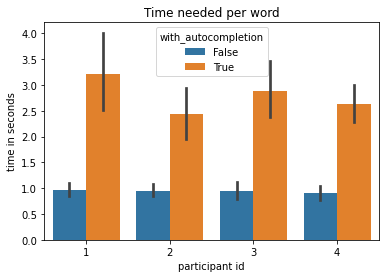

In [65]:
ax = plt.axes()
sns.barplot(data=df_word_events, x="participant_id", y="duration_in_s", hue="with_autocompletion", 
            ax = ax)
ax.set_xlabel("participant id")
ax.set_ylabel("time in seconds")
ax.set_title("Time needed per word")

Something seems wrong.
Let's check:

In [69]:
print(len(words_no_autocomplete_condition_1))
print(len(words_no_autocomplete_condition_2))
print(len(words_autocomplete_condition_1))
print(len(words_autocomplete_condition_2))

234
239
68
75


### Data Analysis:

Seems like our logging did not work properly with our text_input_technique. Sadly this was noticed after we did the experiments with our participants. Since the data ins incorrect we cant do an empiric analysis of our input technique. For further info read the text_input.pdf